In [2]:
import numpy as np
import qiskit as qis

from numpy.random import default_rng

from qiskit.exceptions import QiskitError
from qiskit.quantum_info.operators.random import * 
from qiskit_aer.backends import AerSimulator
from qiskit.quantum_info import *
from qiskit.primitives import Sampler

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

from qiskit.quantum_info import Pauli
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error, amplitude_damping_error)
#from qiskit.extensions import Initialize
import numpy as np
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler
from qiskit_algorithms import AmplificationProblem

from qiskit.circuit.library import GroverOperator

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Botond\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Working self implementation

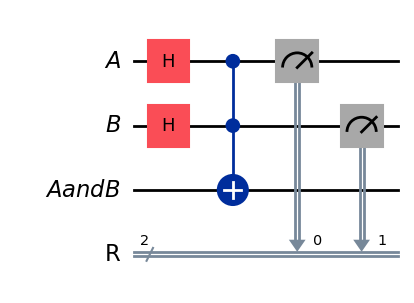

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\1665700921.py:18: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ).result()


In [3]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

R = qis.ClassicalRegister(2, "R")

conj_circ = QuantumCircuit(A, B, AandB, R)

conj_circ.h(A)
conj_circ.h(B)
conj_circ.ccx(A, B, AandB)

conj_circ.measure(0, 0)
conj_circ.measure(1, 1)

display(conj_circ.draw('mpl'))

results = Sampler().run(conj_circ).result()
counts_bas_01 = results.quasi_dists[0].binary_probabilities()

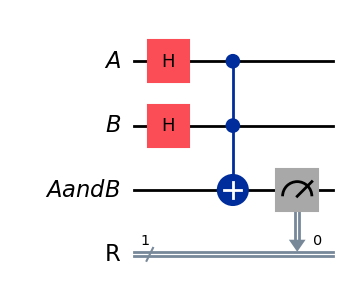

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\628541072.py:17: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ).result()


In [4]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

R = qis.ClassicalRegister(1, "R")

conj_circ = QuantumCircuit(A, B, AandB, R)

conj_circ.h(A)
conj_circ.h(B)
conj_circ.ccx(A, B, AandB)

conj_circ.measure(2, 0)

display(conj_circ.draw('mpl'))

results = Sampler().run(conj_circ).result()
counts_bas_2 = results.quasi_dists[0].binary_probabilities()

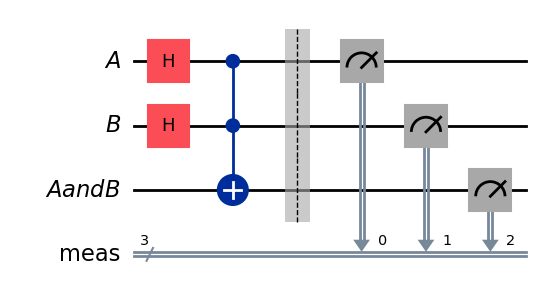

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\1921762649.py:15: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ).result()


In [5]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

conj_circ = QuantumCircuit(A, B, AandB)

conj_circ.h(A)
conj_circ.h(B)
conj_circ.ccx(A, B, AandB)

conj_circ.measure_all()

display(conj_circ.draw('mpl'))

results = Sampler().run(conj_circ).result()
counts_bas_all = results.quasi_dists[0].binary_probabilities()

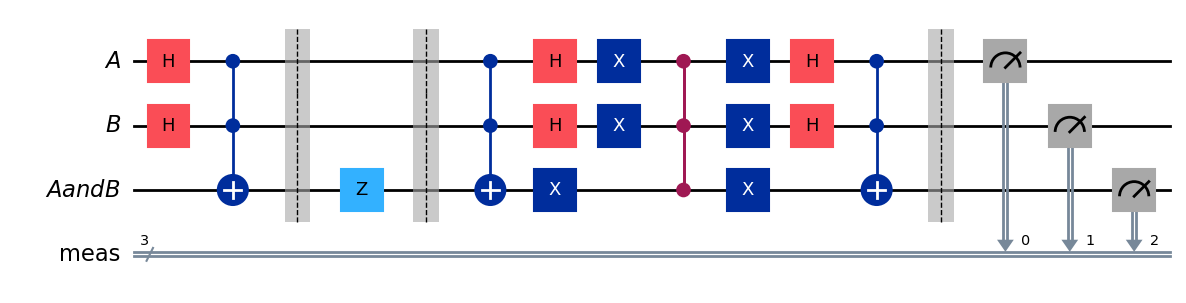

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\3022107114.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ_amp).result()


In [6]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

conj_circ_amp = QuantumCircuit(A, B, AandB)
# Step 2: Apply gates to prepare the state we wish to amplify
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.ccx(A, B, AandB)

# Step 2: Oracle - Mark |11> as the target state
conj_circ_amp.barrier()
conj_circ_amp.z(AandB)
conj_circ_amp.barrier()


# Step 3: Apply the Grover diffusion operator
conj_circ_amp.ccx(A, B, AandB)
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.x(A)
conj_circ_amp.x(B)
conj_circ_amp.x(AandB)

"""conj_circ_amp.cx(A, AandB)
conj_circ_amp.cx(B, AandB)
conj_circ_amp.ccx(A, B, AandB)"""
conj_circ_amp.ccz(A, B, AandB)

conj_circ_amp.x(A)
conj_circ_amp.x(B)
conj_circ_amp.x(AandB)
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.ccx(A, B, AandB)
# Step 5: Measure the qubits
conj_circ_amp.measure_all()

display(conj_circ_amp.draw('mpl'))

results = Sampler().run(conj_circ_amp).result()
counts_amp_all_2 = results.quasi_dists[0].binary_probabilities()


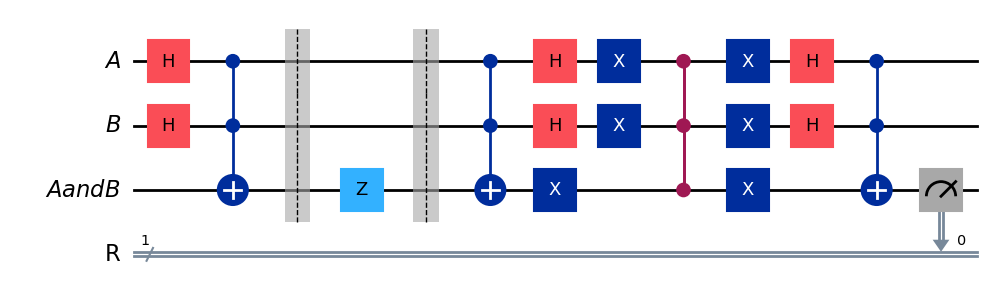

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\600492424.py:43: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ_amp).result()


In [7]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

R = qis.ClassicalRegister(1, "R")

conj_circ_amp = QuantumCircuit(A, B, AandB, R)
# Step 2: Apply gates to prepare the state we wish to amplify
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.ccx(A, B, AandB)

# Step 2: Oracle - Mark |11> as the target state
conj_circ_amp.barrier()
conj_circ_amp.z(AandB)
conj_circ_amp.barrier()


# Step 3: Apply the Grover diffusion operator
conj_circ_amp.ccx(A, B, AandB)
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.x(A)
conj_circ_amp.x(B)
conj_circ_amp.x(AandB)

"""conj_circ_amp.cx(A, AandB)
conj_circ_amp.cx(B, AandB)
conj_circ_amp.ccx(A, B, AandB)"""
conj_circ_amp.ccz(A, B, AandB)

conj_circ_amp.x(A)
conj_circ_amp.x(B)
conj_circ_amp.x(AandB)
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.ccx(A, B, AandB)
# Step 5: Measure the qubits
conj_circ_amp.measure(AandB, R)

display(conj_circ_amp.draw('mpl'))

results = Sampler().run(conj_circ_amp).result()
counts_amp_2_2 = results.quasi_dists[0].binary_probabilities()


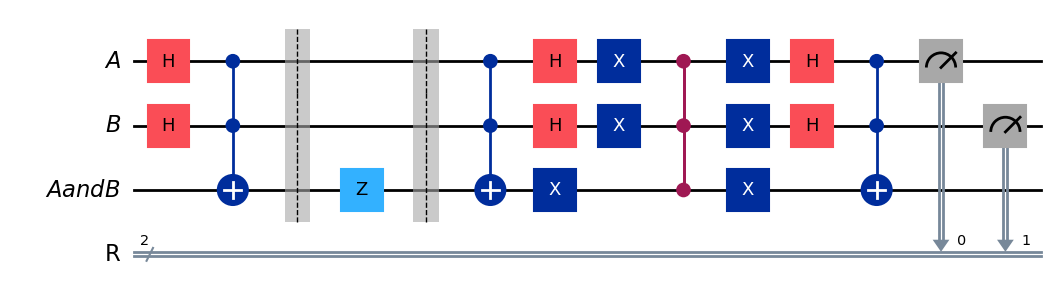

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\4186348606.py:44: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ_amp).result()


In [8]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

R = qis.ClassicalRegister(2, "R")

conj_circ_amp = QuantumCircuit(A, B, AandB, R)
# Step 2: Apply gates to prepare the state we wish to amplify
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.ccx(A, B, AandB)

# Step 2: Oracle - Mark |11> as the target state
conj_circ_amp.barrier()
conj_circ_amp.z(AandB)
conj_circ_amp.barrier()


# Step 3: Apply the Grover diffusion operator
conj_circ_amp.ccx(A, B, AandB)
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.x(A)
conj_circ_amp.x(B)
conj_circ_amp.x(AandB)

"""conj_circ_amp.cx(A, AandB)
conj_circ_amp.cx(B, AandB)
conj_circ_amp.ccx(A, B, AandB)"""
conj_circ_amp.ccz(A, B, AandB)

conj_circ_amp.x(A)
conj_circ_amp.x(B)
conj_circ_amp.x(AandB)
conj_circ_amp.h(A)
conj_circ_amp.h(B)
conj_circ_amp.ccx(A, B, AandB)
# Step 5: Measure the qubits
conj_circ_amp.measure(A, R[0])
conj_circ_amp.measure(B, R[1])

display(conj_circ_amp.draw('mpl'))

results = Sampler().run(conj_circ_amp).result()
counts_amp_01_2 = results.quasi_dists[0].binary_probabilities()


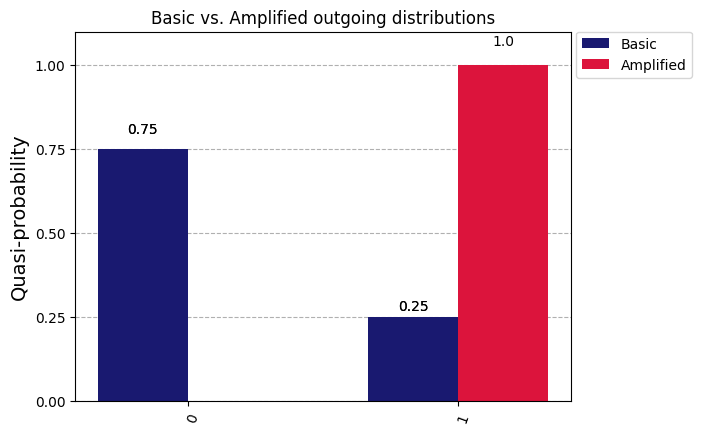

In [9]:
plot_histogram([counts_bas_2, counts_amp_2_2], legend=["Basic", "Amplified"], color=['midnightblue', 'crimson'],
                title="Basic vs. Amplified outgoing distributions")

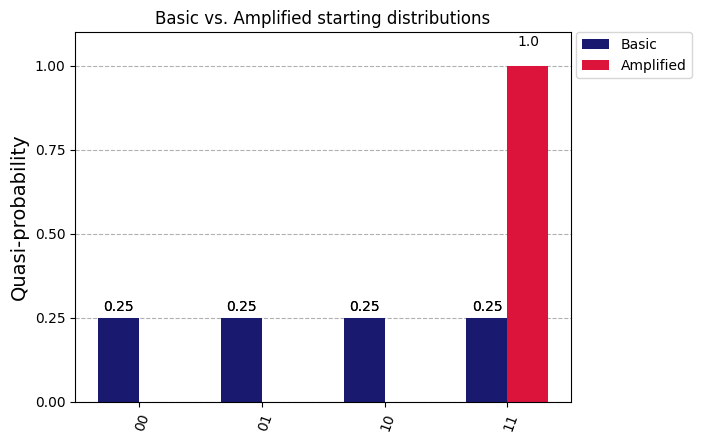

In [10]:
plot_histogram([counts_bas_01, counts_amp_01_2], legend=["Basic", "Amplified"], color=['midnightblue', 'crimson'],
                title="Basic vs. Amplified starting distributions")

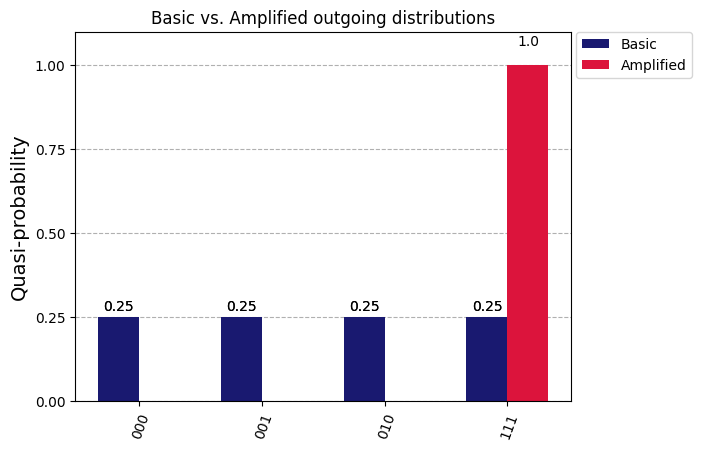

In [11]:
plot_histogram([counts_bas_all, counts_amp_all_2], legend=["Basic", "Amplified"], color=['midnightblue', 'crimson'],
                title="Basic vs. Amplified outgoing distributions")

# Work around a bigger circuit (with more runs)

In [16]:
def state_prep():
    A = qis.QuantumRegister(1, "A")
    B = qis.QuantumRegister(1, "B")
    C = qis.QuantumRegister(1, "C")
    AorB = qis.QuantumRegister(1, "AorB")
    AorBornotC = qis.QuantumRegister(1, "AandBornotC")

    prep_circ = QuantumCircuit(A, B, C, AorB, AorBornotC)

    prep_circ.h(A)
    prep_circ.h(B)
    prep_circ.h(C)

    prep_circ.barrier()
    prep_circ.x(C) # = notC

    prep_circ.barrier()
    prep_circ.cx(A, AorB)
    prep_circ.cx(B, AorB)
    prep_circ.ccx(A, B, AorB) # = AorB

    prep_circ.barrier()
    prep_circ.cx(C, AorBornotC)
    prep_circ.cx(AorB, AorBornotC)
    prep_circ.ccx(C, AorB, AorBornotC)

    return prep_circ

def oracle(input_circ):
    len = input_circ.num_qubits
    b1 = QuantumCircuit(len)
    b1.x(len - 1)
    b1.z(len - 1)
    b1.x(len - 1)

    return b1

def diffusion(input_circ):
    len = input_circ.num_qubits
    b1 = QuantumCircuit(len)
    b2 = b1.compose(input_circ.inverse())

    for qubit in range(len ):
        b2.x(qubit)

    b2.h(len - 1)
    b2.mcx(list(range(0, len - 2)), len - 1)
    b2.h(len - 1)

    for qubit in range(len ):
        b2.x(qubit)

    diffusion = b2.compose(input_circ)

    return diffusion


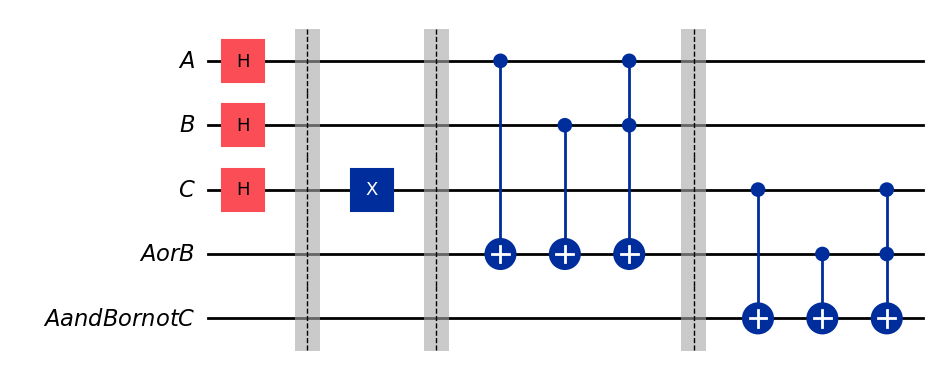

In [17]:
prep_circ = state_prep()
display(prep_circ.draw('mpl'))


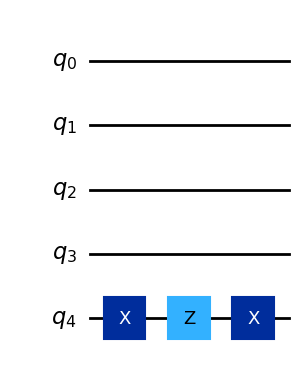

In [18]:
oracle = oracle(prep_circ)
display(oracle.draw('mpl'))

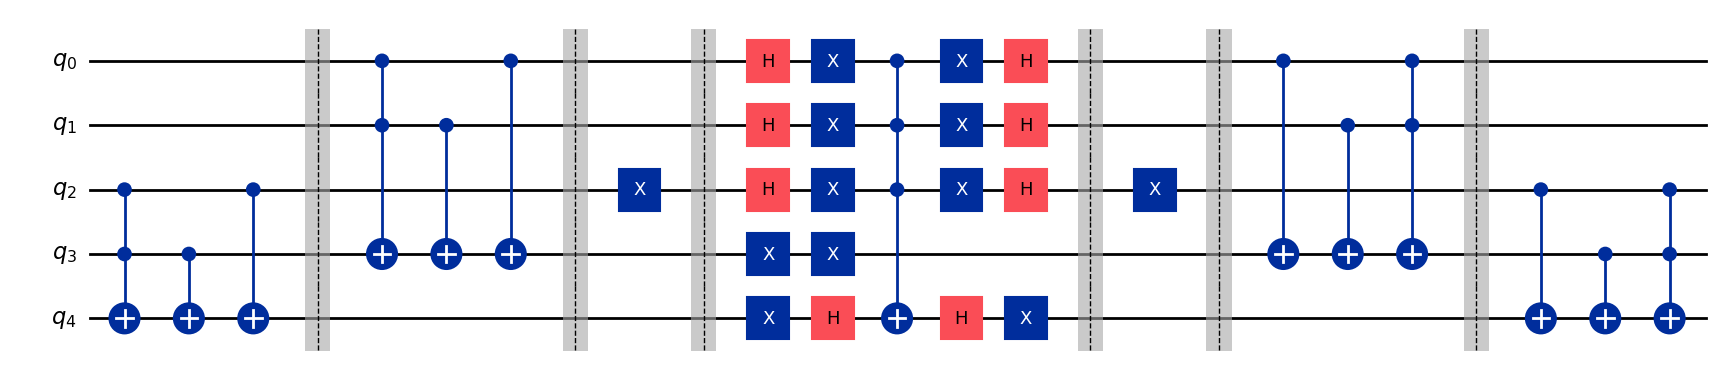

In [19]:
amplifier = diffusion(prep_circ)
display(amplifier.draw('mpl'))

In [20]:
amplified_circ = prep_circ.compose(oracle).compose(amplifier)
#this is one run of the diffusion operator

In [21]:
amplified_circ_2 = amplified_circ.compose(oracle).compose(amplifier)
#this is two runs of the diffusion operator

amplified_circ_3 = amplified_circ_2.compose(amplifier)
#this is two runs of the diffusion operator

In [22]:
prep_circ_base = prep_circ.copy()
prep_circ_base.add_register(ClassicalRegister(3))

prep_circ_base.measure([0,1,2], [0,1,2])

results_prep_base = Sampler().run(prep_circ_base).result()
prep_base = results_prep_base.quasi_dists[0].binary_probabilities()

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\3717473237.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results_prep_base = Sampler().run(prep_circ_base).result()


In [23]:
prep_circ_out = prep_circ.copy()
prep_circ_out.add_register(ClassicalRegister(1))

prep_circ_out.measure(4, 0)

results_prep_out = Sampler().run(prep_circ_out).result()
prep_out = results_prep_out.quasi_dists[0].binary_probabilities()

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\2455594618.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results_prep_out = Sampler().run(prep_circ_out).result()


In [24]:
amplified_circ_base = amplified_circ.copy()
amplified_circ_base.add_register(ClassicalRegister(3))

amplified_circ_base.measure([0,1,2], [0,1,2])

results_amplified_base = Sampler().run(amplified_circ_base).result()
amplified_base = results_amplified_base.quasi_dists[0].binary_probabilities()

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\2266899336.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results_amplified_base = Sampler().run(amplified_circ_base).result()


In [25]:
amplified_circ_out = amplified_circ.copy()
amplified_circ_out.add_register(ClassicalRegister(1))

amplified_circ_out.measure(4, 0)

results_amplified_circ_out = Sampler().run(amplified_circ_out).result()
amplified_out = results_amplified_circ_out.quasi_dists[0].binary_probabilities()

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\1661742403.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results_amplified_circ_out = Sampler().run(amplified_circ_out).result()


In [26]:
amplified_circ_2_base = amplified_circ_2.copy()
amplified_circ_2_base.add_register(ClassicalRegister(3))

amplified_circ_2_base.measure([0,1,2], [0,1,2])

results_amplified_2_base = Sampler().run(amplified_circ_2_base).result()
amplified_2_base = results_amplified_2_base.quasi_dists[0].binary_probabilities()

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\1408924013.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results_amplified_2_base = Sampler().run(amplified_circ_2_base).result()


In [27]:
amplified_circ_2_out = amplified_circ_2.copy()
amplified_circ_2_out.add_register(ClassicalRegister(1))

amplified_circ_2_out.measure(4, 0)

results_amplified_circ_2_out = Sampler().run(amplified_circ_2_out).result()
amplified_2_out = results_amplified_circ_2_out.quasi_dists[0].binary_probabilities()

C:\Users\Botond\AppData\Local\Temp\ipykernel_26808\2556436181.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results_amplified_circ_2_out = Sampler().run(amplified_circ_2_out).result()


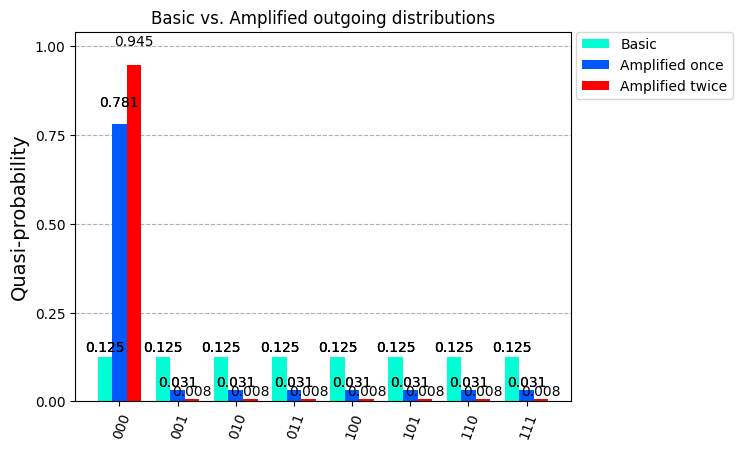

In [28]:
plot_histogram([prep_base, amplified_base, amplified_2_base], legend=["Basic", "Amplified once", "Amplified twice"], color=['#00ffd4', '#0059FF', '#ff0000'],
                title="Basic vs. Amplified outgoing distributions")

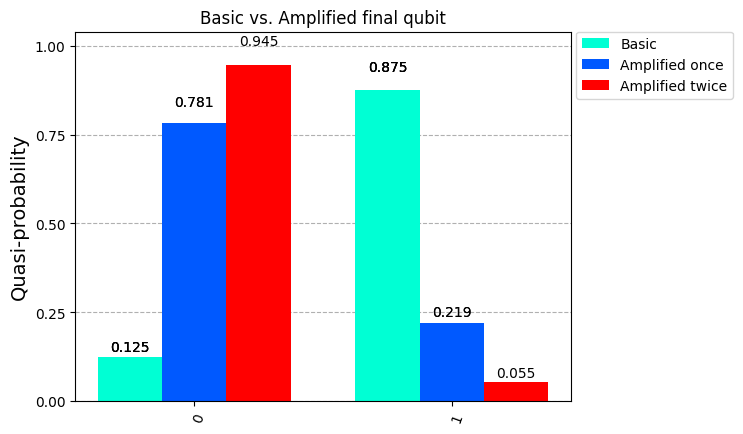

In [29]:
plot_histogram([prep_out, amplified_out, amplified_2_out], legend=["Basic", "Amplified once", "Amplified twice"], color=['#00ffd4', '#0059FF', '#ff0000'],
                title="Basic vs. Amplified final qubit")

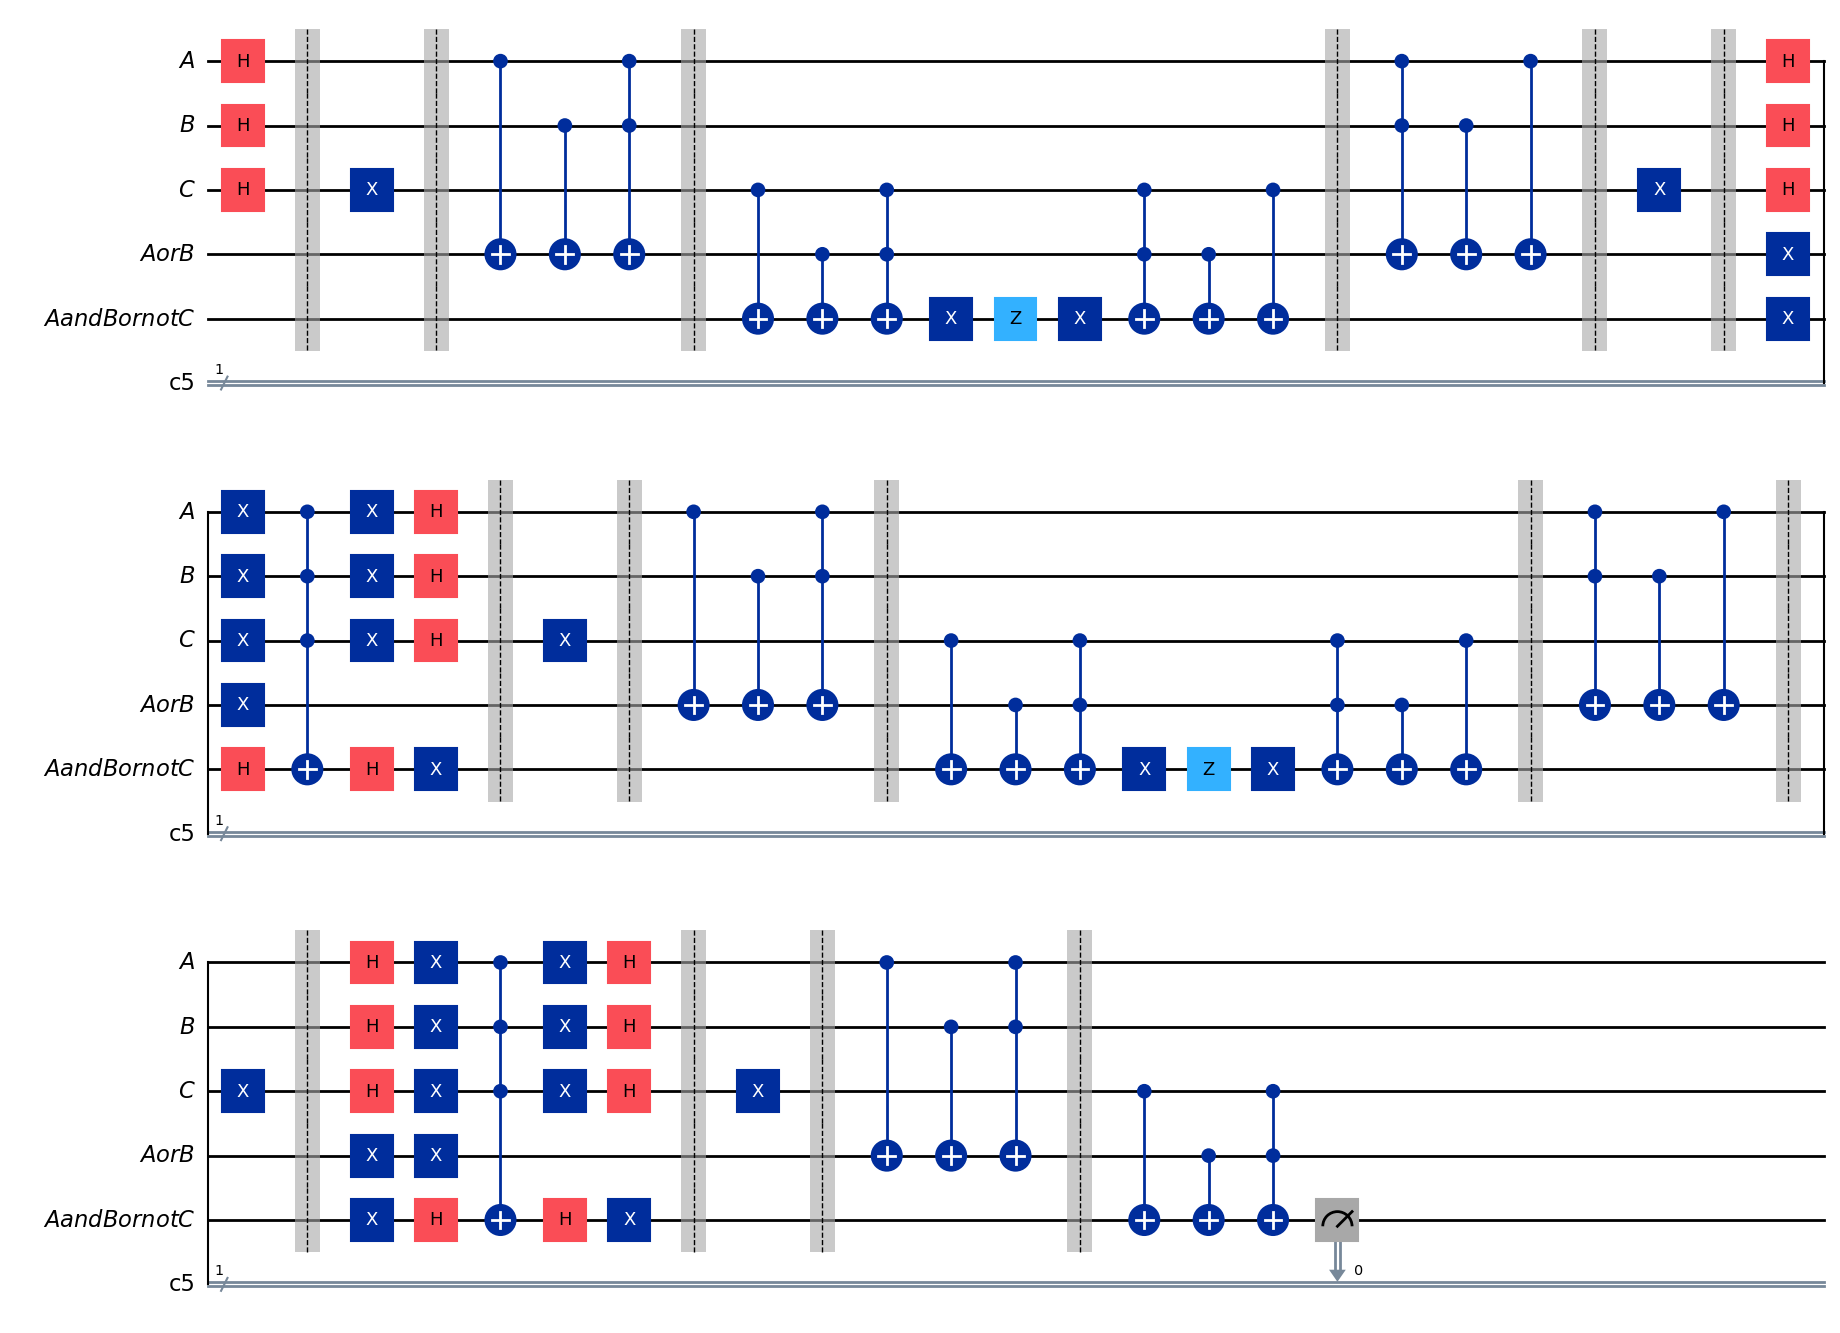

In [32]:

display(amplified_circ_2_out.draw('mpl'))

# We can teratively compose the circuits together with a loop!!

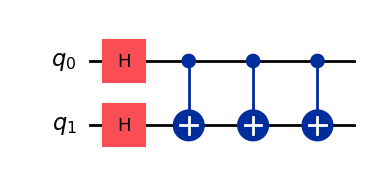

In [40]:
q1 = qis.QuantumCircuit(2)
q2 = qis.QuantumCircuit(2)

q1.h(0)
q1.h(1)

q2.cx(0,1)

for _ in range(3):
    q1 = q1.compose(q2)

display(q1.draw('mpl'))

# Qiskit implementation

In [43]:
#define Oracle to marke the state |xx1>
oracle = QuantumCircuit(3)
oracle.ccz(0, 1, 2)

#and the state preparation for the algorithm
state_preparation = QuantumCircuit(3)
state_preparation.h(0)
state_preparation.h(1)
state_preparation.ccx(0, 1, 2)

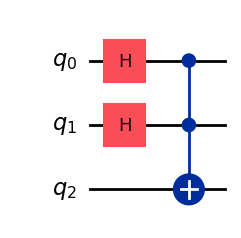

In [44]:
state_preparation.draw("mpl")

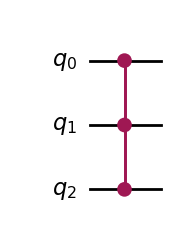

In [46]:
oracle.draw("mpl")

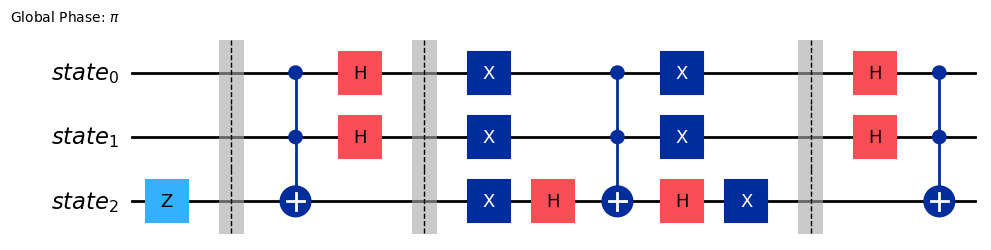

In [42]:
#define the grover operator for the diffusion steps in the process
grover_op = GroverOperator(oracle, state_preparation, insert_barriers=True)
grover_op.decompose().draw(output="mpl")

In [19]:
# we only care about the first two bits being in state 1, thus add all possibilities for the last qubit
problem = AmplificationProblem(
    oracle, state_preparation, is_good_state=["001", "011", "101", "111"]
)

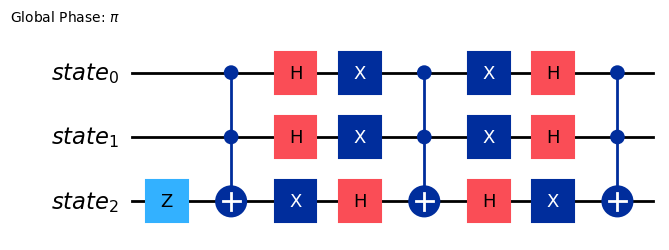

In [20]:
problem.grover_operator.decompose().draw(output="mpl")

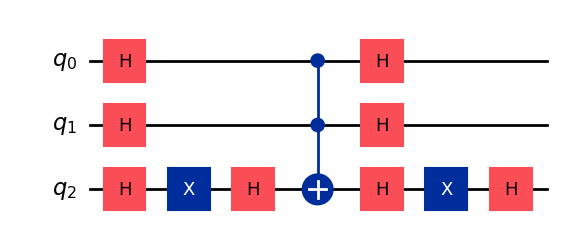

In [16]:
def custom_diffusion_operator():
    qc = QuantumCircuit(3)

    # Step 1: Apply Hadamard to all qubits
    qc.h([0, 1, 2])
    
    # Step 2: Apply X gates to select states where last qubit is 0
    qc.x(2)
    
    # Step 3: Apply multi-controlled Z gate to mark |xx0⟩ states
    qc.h(2)
    qc.mcx([0, 1], 2)  # Multi-controlled X (acts as CCZ)
    qc.h(2)
    
    # Step 4: Undo X gates
    qc.x(2)
    
    # Step 5: Apply Hadamard again
    qc.h([0, 1, 2])

    return qc

# Create the diffusion operator circuit
diffusion = custom_diffusion_operator()
diffusion.draw('mpl')

# other qsikit implementation


In [57]:
# Specifying `state_preparation`
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.ccz(0, 1, 2)

#and the state preparation for the algorithm
state_preparation = QuantumCircuit(3)
state_preparation.h(0)
state_preparation.h(1)
state_preparation.ccx(0, 1, 2)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
problem = AmplificationProblem(
    oracle, state_preparation=state_preparation, is_good_state=["111"]
)


In [58]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Success!
Top measurement: 111


C:\Users\Botond\AppData\Local\Temp\ipykernel_16996\336064450.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


In [62]:
g_qc = problem.grover_operator.decompose()

In [70]:
g_qc.add_register(ClassicalRegister(3))
g_qc.measure_all()

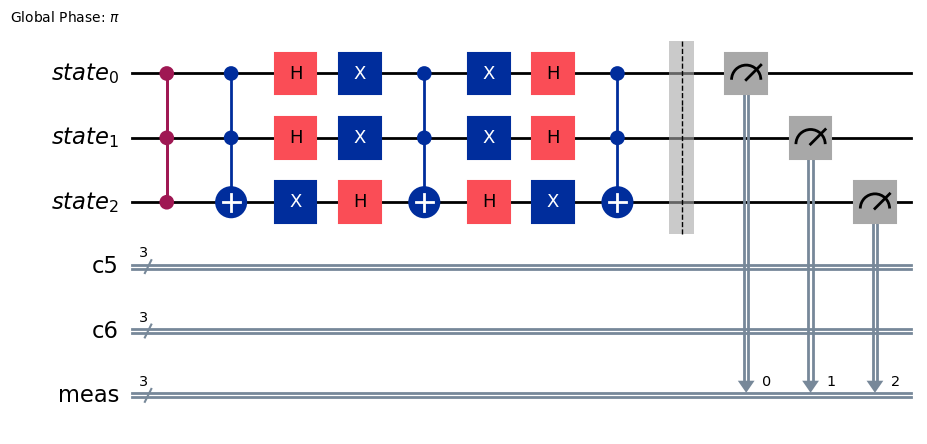

In [71]:
g_qc.draw(output="mpl")

In [73]:
# Step 3: Run circuit before amplification
backend = AerSimulator(method="statevector")

counts_amplified = backend.run(g_qc, shots=1024).result().get_counts()

In [76]:
#plot_histogram(counts_initial, ax=axes[0], title="Before Amplitude Amplification")
display(plot_histogram(counts_amplified, ax=axes[1], title="After Amplitude Amplification (Qubit 2 = 1)"))


TypeError: 'function' object is not subscriptable

In [77]:
counts_amplified

{'001 000 000': 255,
 '111 000 000': 261,
 '000 000 000': 268,
 '010 000 000': 240}

In [55]:
import matplotlib.pyplot as plt
from qiskit_aer.backends import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_algorithms import Grover, AmplificationProblem
from qiskit.primitives import Sampler

# Step 1: Define the Oracle (marks states where qubit 2 is |1⟩)
def oracle():
    qc = QuantumCircuit(3)
    qc.cz(1, 2)  # Controlled-Z flips phase of |X X 1⟩ (|111⟩)
    return qc

# Step 2: Define the custom initial superposition state
def initial_state():
    qc = QuantumCircuit(3)
    qc.h(0)         # Superposition on qubit 0
    qc.cx(0, 1)     # Correlate qubit 1 with qubit 0 (|00> + |01>)
    qc.h(2)         # Superposition on qubit 2
    return qc

# Step 3: Run circuit before amplification
backend = AerSimulator(method="statevector")

qc_initial = initial_state()
qc_initial.measure_all()

# Execute and store initial measurement results
counts_initial = backend.run(qc_initial, shots=1024).result().get_counts()




In [56]:
# Step 4: Set up the AmplificationProblem
oracle_circuit = oracle()
problem = AmplificationProblem(oracle_circuit, state_preparation=initial_state())

# Step 5: Apply Grover's algorithm (1 iteration)
grover = Grover(sampler=Sampler(), iterations=1)
grover_result = grover.amplify(problem)

# Step 6: Run and store amplified measurement results
counts_amplified = backend.run(problem.grover_operator.decompose(), shots=1024).result().get_counts()

# Step 7: Plot both distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_histogram(counts_initial, ax=axes[0], title="Before Amplitude Amplification")
plot_histogram(counts_amplified, ax=axes[1], title="After Amplitude Amplification (Qubit 2 = 1)")
plt.show()

C:\Users\Botond\AppData\Local\Temp\ipykernel_16996\3167108044.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler(), iterations=1)


QiskitError: 'No counts for experiment "0"'

In [38]:
grover_result